In [1]:
import numpy as np
import matplotlib.pyplot as plt

from processes import l

In [2]:
# matplotlib settings
# load LaTeX fonts for plot labels

figsize = (8,5)

plt.rc('mathtext', fontset="cm")
plt.rcParams.update({
'font.size': 12,
'text.usetex': True,
'text.latex.preamble': r'\usepackage{amsfonts}'
})

# Path simulation of process $\ell^{S|\emptyset}$.

Sample: 1 / 5


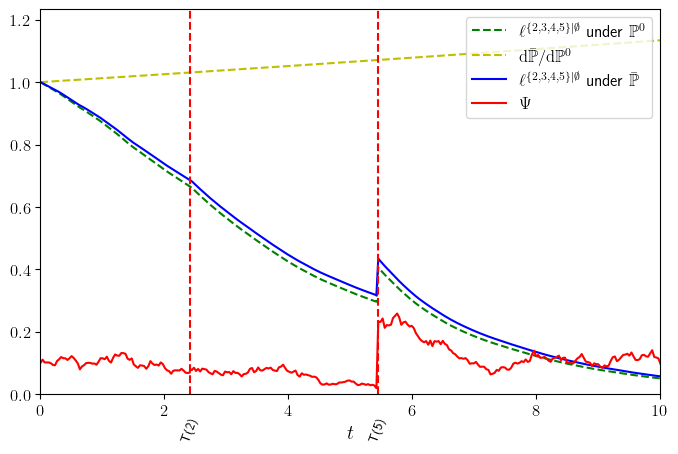

Sample: 2 / 5


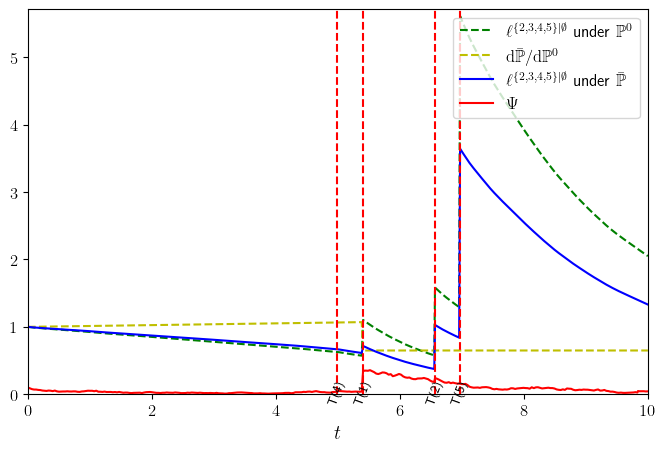

Sample: 3 / 5


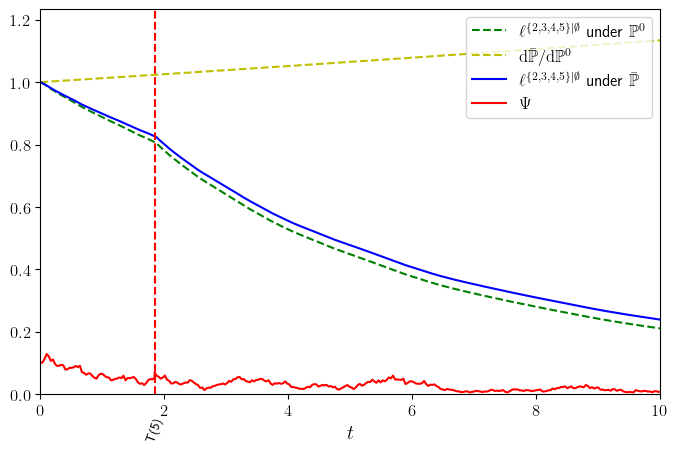

Sample: 4 / 5


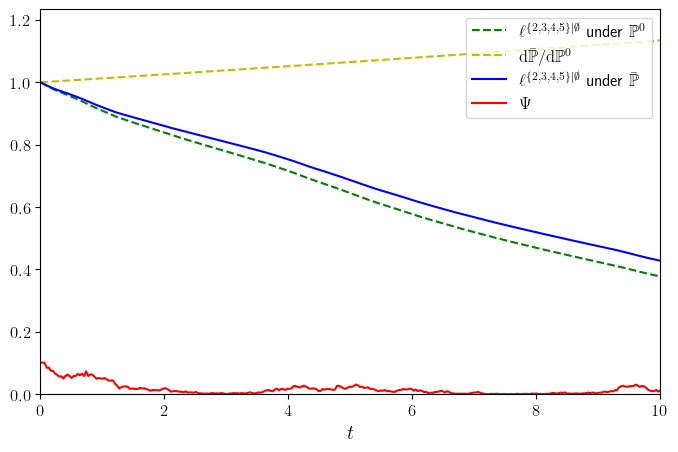

Sample: 5 / 5


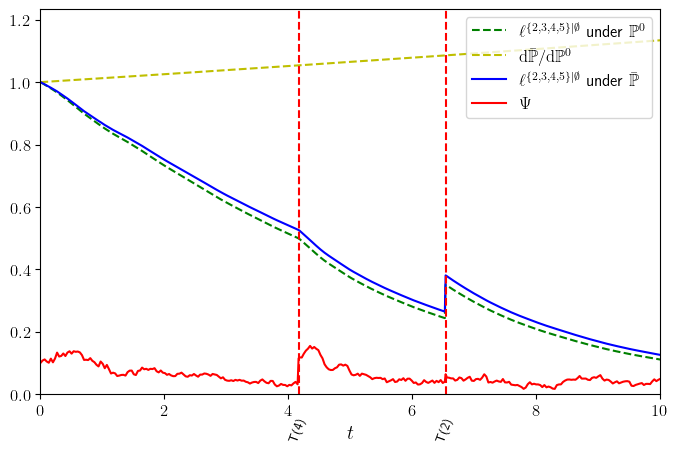

In [3]:
# Fix time grid
max_time = 10.
ts = np.linspace(0., max_time, 300)

# Fix set of entities 
n = 5 # number of entities
S = set([1, 2, 3, 4]) # target set C = {0, 1, 2, 3, 4}\S = {0}
SDE_proc = l(n, S, verbose=False)

# number of paths to simulate
n_samples = 5

results = np.zeros((n_samples, len(ts)))
for i_sample in range(n_samples):
    print('Sample:', i_sample+1, '/', n_samples)
    sample = SDE_proc.sample(ts)
    plt.figure(figsize=(8, 5))
    
    index_S = int(np.sum([2**x for x in SDE_proc.S_star]))
    index_D = int(np.sum([2**x for x in set()]))
    
    l_proc = SDE_proc._l[SDE_proc.indices_dict[(index_S, index_D)], :]
    change_of_measure = np.prod(SDE_proc._change_of_measure[list(SDE_proc.C_star), :], axis=0)
    
    max_val = np.maximum(change_of_measure.max(), l_proc.max()) + 0.1

    plt.plot(sample.ts, l_proc, 'g--', label=r'$\ell^{\{2,3,4,5\}|\emptyset}$ under $\mathbb{P}^0$')
    plt.plot(sample.ts, change_of_measure, 'y--', label=r'$\textrm{d} \bar{\mathbb{P}} / \textrm{d} \mathbb{P}^0$')
    plt.plot(sample.ts, sample.vals, 'b-', label=r'$\ell^{\{2,3,4,5\}|\emptyset}$ under $\bar{\mathbb{P}}$')
    
    plt.plot(sample.ts, SDE_proc.factor.vals, 'r-', label=r'$\Psi$')
    
    end_of_grid = np.where(ts == max_time)[0][0]
    
    # Plotting vertical bars at jump times T(k)
    for k, jump_time in enumerate(SDE_proc.T):
        if jump_time <= max_time:
            plt.vlines(jump_time, 0., max_val, color='red', linestyles='dashed')
            plt.text(jump_time - 0.175, -0.15, 'T(' + str(k+1) + ')', rotation=70, fontsize=9)
    #plt.legend(loc=(0, 1.05))
    plt.legend(loc='upper right')
    plt.xlim([0., 10.])
    plt.ylim([0., max_val])
    plt.xlabel(r'$t$', fontsize='large')
   
    #plt.savefig('pics/simulated paths/sim' + str(i_sample) + '.pdf', dpi=300, bbox_inches = "tight")
    plt.show()
    time_indices = [np.where(ts == t)[0][0] for t in sample.ts if np.isin(t, ts)]
    results[i_sample, time_indices] = sample.vals[time_indices]